<a href="https://colab.research.google.com/github/AMO-35/Text_Sensitivity_Prediction_using_BiLSTM/blob/main/Text_Sensitivity_Prediction_using_BiLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.python.client import device_lib
tf.test.gpu_device_name()

''

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/text_sensitivity_final_v2.csv")

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/text_sensitivity_final_v2.csv')


In [ ]:
df.head()

,Unnamed: 0,text,label
0,0,হান্টার বাইডেনের দোষ স্বীকার করে নেওয়ার চুক্তি...,0
1,1,যুক্তরাষ্ট্রের নৌবাহিনীর প্রধান পদে প্রথম কোনো...,0
2,2,মাত্র ২৪ ঘণ্টায় ইউক্রেনে যেভাবে শান্তি নিশ্চিত...,0
3,3,প্রিগোজিন এখন রাশিয়ায়,0
4,4,আফ্রিকার ৬ দেশকে বিনামূল্যে গম দেবে রাশিয়া,0


In [ ]:
df1

,Unnamed: 0,text,label
0,0,হান্টার বাইডেনের দোষ স্বীকার করে নেওয়ার চুক্তি...,0
1,1,যুক্তরাষ্ট্রের নৌবাহিনীর প্রধান পদে প্রথম কোনো...,0
2,2,মাত্র ২৪ ঘণ্টায় ইউক্রেনে যেভাবে শান্তি নিশ্চিত...,0
3,3,প্রিগোজিন এখন রাশিয়ায়,0
4,4,আফ্রিকার ৬ দেশকে বিনামূল্যে গম দেবে রাশিয়া,0
...,...,...,...
6985,6985,সংযুক্ত আরব আমিরাতের ‘গোল্ডেন ভিসা’ পেলেন অভিন...,4
6986,6986,অদম্য হীরা-মুক্তার জিপিএ-৫ অর্জন,4
6987,6987,বাবার লাশ বাড়িতে রেখে পরীক্ষা দেওয়া লাবিবা জিপ...,4
6988,6988,৪১তম বিসিএসে পুলিশ ক্যাডারে প্রথম জাহিদ হাসান,4


In [ ]:
df1.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df.columns

Index(['text', 'label'], dtype='object')

In [ ]:
print("Size of the dataframe {}\n".format(df.shape))

Size of the dataframe (6990, 2)



In [ ]:
print("Datatypes of the features \n{}\n".format(df.dtypes))

Datatypes of the features 
text     object
label     int64
dtype: object



In [ ]:
print("Value count of target column \n{}\n".format(df["label"].value_counts()))

Value count of target column 
0    1165
1    1165
2    1165
3    1165
4    1165
5    1165
Name: label, dtype: int64



In [ ]:
df.columns

Index(['text', 'label'], dtype='object')

In [ ]:
lst = [1112, 1002, 949, 999, 884, 1165]

In [ ]:
txt = []
lbl = []

In [ ]:
for i in range(0, 6110):
  if lst[df["label"][i]] < 1165:
    txt.append(df["text"][i])
    lbl.append(df["label"][i])
    lst[df["label"][i]] = lst[df["label"][i]] + 1

In [ ]:
print(len(txt))
print(len(lbl))

879
879


In [ ]:
print("Null columns {}".format(df["text"].isnull().sum()))

Null columns 0


In [ ]:
df = df.dropna(subset = "text")

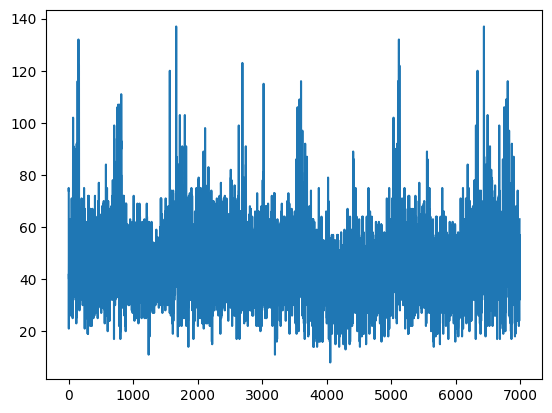

In [ ]:
# ploting the world length of the tweets

word_length = [len(x) for x in df["text"]]
plt.plot(word_length)

In [ ]:
# converting sentence to string

df["text"] = df["text"].astype(str)

In [ ]:
# Types of products
df['label'].value_counts()

0    1165
1    1165
2    1165
3    1165
4    1165
5    1165
Name: label, dtype: int64

In [ ]:
df.columns

Index(['text', 'label'], dtype='object')

In [ ]:
#df.to_csv("/content/drive/MyDrive/Text Sensitivity/text_sensitivity_final.csv", index = False)

In [ ]:
#df

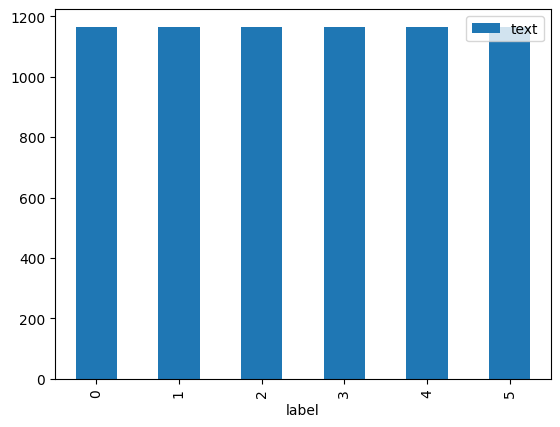

In [ ]:
df.groupby("label").count().plot(kind = "bar")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df, test_size = 0.2)
test_data, test_data_2 = train_test_split(test_data, test_size = 0.4)

# the code is splitting a DataFrame into three parts: train_data for training, test_data for initial testing, and test_data_2 for further testing.After the first split, a further split is performed on the test_data obtained from the first split.

In [ ]:
# Importing NLTK Libraries
import nltk
from nltk.corpus import stopwords
from nltk import *

In [ ]:
stop_words = ["অতএব","অথচ","অথবা","অনুযায়ী","অনেক","অনেকে","অনেকেই","অন্তত","অন্য","অবধি","অবশ্য","অর্থাত","আই","আগামী","আগে","আগেই","আছে","আজ","আদ্যভাগে","আপনার","আপনি","আবার","আমরা","আমাকে","আমাদের","আমার","আমি","আর","আরও","ই","ইত্যাদি","ইহা","উচিত","উত্তর","উনি","উপর","উপরে","এ","এঁদের","এঁরা","এই","একই","একটি","একবার","একে","এক্","এখন","এখনও","এখানে","এখানেই","এটা","এটাই","এটি","এত","এতটাই","এতে","এদের","এব","এবং","এবার","এমন","এমনকী","এমনি","এর","এরা","এল","এস","এসে","ঐ","ও","ওঁদের","ওঁর","ওঁরা","ওই","ওকে","ওখানে","ওদের","ওর","ওরা","কখনও","কত","কবে","কমনে","কয়েক","কয়েকটি","করছে","করছেন","করতে","করবে","করবেন","করলে","করলেন","করা","করাই","করায়","করার","করি","করিতে","করিয়া","করিয়ে","করে","করেই","করেছিলেন","করেছে","করেছেন","করেন","কাউকে","কাছ","কাছে","কাজ","কাজে","কারও","কারণ","কি","কিংবা","কিছু","কিছুই","কিন্তু","কী","কে","কেউ","কেউই","কেখা","কেন","কোটি","কোন","কোনও","কোনো","ক্ষেত্রে","কয়েক","খুব","গিয়ে","গিয়েছে","গিয়ে","গুলি","গেছে","গেল","গেলে","গোটা","চলে","চান","চায়","চার","চালু","চেয়ে","চেষ্টা","ছাড়া","ছাড়াও","ছিল","ছিলেন","জন","জনকে","জনের","জন্য","জন্যওজে","জানতে","জানা","জানানো","জানায়","জানিয়ে","জানিয়েছে","জে","জ্নজন","টি","ঠিক","তখন","তত","তথা","তবু","তবে","তা","তাঁকে","তাঁদের","তাঁর","তাঁরা","তাঁাহারা","তাই","তাও","তাকে","তাতে","তাদের","তার","তারপর","তারা","তারৈ","তাহলে","তাহা","তাহাতে","তাহার","তিনঐ","তিনি","তিনিও","তুমি","তুলে","তেমন","তো","তোমার","থাকবে","থাকবেন","থাকা","থাকায়","থাকে","থাকেন","থেকে","থেকেই","থেকেও","দিকে","দিতে","দিন","দিয়ে","দিয়েছে","দিয়েছেন","দিলেন","দু","দুই","দুটি","দুটো","দেওয়া","দেওয়ার","দেওয়া","দেখতে","দেখা","দেখে","দেন","দেয়","দ্বারা","ধরা","ধরে","ধামার","নতুন","নয়","না","নাই","নাকি","নাগাদ","নানা","নিজে","নিজেই","নিজেদের","নিজের","নিতে","নিয়ে","নিয়ে","নেই","নেওয়া","নেওয়ার","নেওয়া","নয়","পক্ষে","পর","পরে","পরেই","পরেও","পর্যন্ত","পাওয়া","পাচ","পারি","পারে","পারেন","পি","পেয়ে","পেয়্র্","প্রতি","প্রথম","প্রভৃতি","প্রযন্ত","প্রাথমিক","প্রায়","প্রায়","ফলে","ফিরে","ফের","বক্তব্য","বদলে","বন","বরং","বলতে","বলল","বললেন","বলা","বলে","বলেছেন","বলেন","বসে","বহু","বা","বাদে","বার","বি","বিনা","বিভিন্ন","বিশেষ","বিষয়টি","বেশ","বেশি","ব্যবহার","ব্যাপারে","ভাবে","ভাবেই","মতো","মতোই","মধ্যভাগে","মধ্যে","মধ্যেই","মধ্যেও","মনে","মাত্র","মাধ্যমে","মোট","মোটেই","যখন","যত","যতটা","যথেষ্ট","যদি","যদিও","যা","যাঁর","যাঁরা","যাওয়া","যাওয়ার","যাওয়া","যাকে","যাচ্ছে","যাতে","যাদের","যান","যাবে","যায়","যার","যারা","যিনি","যে","যেখানে","যেতে","যেন","যেমন","র","রকম","রয়েছে","রাখা","রেখে","লক্ষ","শুধু","শুরু","সঙ্গে","সঙ্গেও","সব","সবার","সমস্ত","সম্প্রতি","সহ","সহিত","সাধারণ","সামনে","সি","সুতরাং","সে","সেই","সেখান","সেখানে","সেটা","সেটাই","সেটাও","সেটি","স্পষ্ট","স্বয়ং","হইতে","হইবে","হইয়া","হওয়া","হওয়ায়","হওয়ার","হচ্ছে","হত","হতে","হতেই","হন","হবে","হবেন","হয়","হয়তো","হয়নি","হয়ে","হয়েই","হয়েছিল","হয়েছে","হয়েছেন","হল","হলে","হলেই","হলেও","হলো","হাজার","হিসাবে","হৈলে","হোক","হয়"]

In [ ]:
import re
import nltk
nltk.download('punkt')
def preprocess(string):
  # punctuation marks
  punctuations = '''!()-[]{};:'"।\,<>./?@#$%^&*_~='''

  # traverse the given str and if any punctuation
  # marks occur replace it with null
  str1 = str(string)
  for x in str1.lower():
      if x in punctuations:
          str1 = str1.replace(x, "")
      if x >='a' and x <= 'z':
        str1 = str1.replace(x, "")
      if x >='A' and x <= 'Z':
        str1 = str1.replace(x, "")
      if(x =='।'):
        str1 = str1.replace(x, "")
  wordToken = word_tokenize(str1)
  removeDuplicate = list(dict.fromkeys(wordToken))
  return removeDuplicate
Corpus = []
for lines in df1["text"]:
  Result = preprocess(lines)
  Corpus.append(Result)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
import gensim
DIM = 32

X = Corpus
w2v_model = gensim.models.FastText(sentences = X, vector_size = DIM, window = 10, min_count = 1, sg = 0)

In [ ]:
# Declaring function for text preprocessing

def preprocess_text(main_df):
  df_1 = main_df.copy()

  # remove stopwords
  nltk.download('stopwords')         # Downloading stopwords
  stop = stopwords.words('bengali')
  df_1['text'] = df_1['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))

  # remove punctuations and convert to lower case
  df_1['text'] = df_1['text'].apply(lambda x: re.sub('[!@#$:).;,?&]', '', x.lower()))

  # remove double spaces
  df_1['text'] = df_1['text'].apply(lambda x: re.sub(' ', ' ', x))

  return df_1

In [ ]:
# Preprocessing training and test data
train_data = preprocess_text(train_data)
test_data = preprocess_text(test_data)
test_data_2 = preprocess_text(test_data_2)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Verifying text preprocessing
train_data['text'].head()

3309     মাদক কারবারিদের ধরতে হাতাহাতি ২ র‌্যাব সদস্য আহত
2992    যাচ্ছি নেটওয়ার্কের বাইরে স্ট্যাটাস দিয়ে তরুণের...
3176                 নেতিবাচক প্রভাব পড়ছে পুরো অর্থনীতিতে
2283      বাংলাদেশ সেনাবাহিনীর শুটিং প্রতিযোগিতা অনুষ্ঠিত
2169                            কাল ফেডারেশন কাপের ফাইনাল
Name: text, dtype: object

In [ ]:
# Declaring train labels
train_labels = train_data['label']
test_labels = test_data['label']
test_labels_2 = test_data_2['label']

In [ ]:
# Converting labels to numerical features
import numpy as np
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train_labels)
train_labels = le.transform(train_labels)
test_labels = le.transform(test_labels)
test_labels_2 = le.transform(test_labels_2)

print(le.classes_)
print(np.unique(train_labels, return_counts=True))
print(np.unique(test_labels, return_counts=True))
print(np.unique(test_labels_2, return_counts=True))

[0 1 2 3 4 5]
(array([0, 1, 2, 3, 4, 5]), array([911, 930, 961, 927, 946, 917]))
(array([0, 1, 2, 3, 4, 5]), array([150, 143, 122, 140, 137, 146]))
(array([0, 1, 2, 3, 4, 5]), array([104,  92,  82,  98,  82, 102]))


In [ ]:
train_labels

array([3, 3, 3, ..., 2, 0, 0])

In [ ]:
# Changing labels to categorical features
import numpy as np
from tensorflow.python.keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
import numpy as np

train_labels = to_categorical(np.asarray(train_labels))
test_labels = to_categorical(np.array(test_labels))
test_labels_2 = to_categorical(np.array(test_labels_2))

In [ ]:
train_labels

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Defining training parameters
max_sequence_length = 170
max_words = 2500

# Tokenizing tweets/sentences wrt num_words
tokenizer = Tokenizer(num_words = max_words)  # Selects most frequent words
tokenizer.fit_on_texts(train_data.text)      # Develops internal vocab based on training text
train_sequences = tokenizer.texts_to_sequences(train_data.text)  # converts text to sequence

test_sequences = tokenizer.texts_to_sequences(test_data.text)
test_sequences_2 = tokenizer.texts_to_sequences(test_data_2.text)

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
vocab = tokenizer.word_index

In [ ]:
def get_weights_matrix(model) :
    weights_matrix = np.zeros((vocab_size, DIM))

    for word, i in vocab.items() :
      try:
        weights_matrix[i] = model.wv[word]
      except:
        pass
    return weights_matrix


embedding_vectors = get_weights_matrix(w2v_model)

In [ ]:
# Fixing the sequence length
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_data = pad_sequences(train_sequences, maxlen = max_sequence_length)
test_data = pad_sequences(test_sequences, maxlen = max_sequence_length)
test_data_2= pad_sequences(test_sequences_2, maxlen = max_sequence_length)
train_data.shape, test_data.shape

((5592, 170), (838, 170))

In [ ]:
# Importing Libraries

import tensorflow as tf
import sys, os, re, csv, codecs, numpy as np, pandas as pd
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D, Conv1D, SimpleRNN
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers
from tensorflow.keras.layers import Dense, Input, Input, Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding

In [ ]:
embedding_dim = 32

# Model Training
model = Sequential()
model.add(Embedding(vocab_size, output_dim = DIM, weights = [embedding_vectors], input_length =max_sequence_length))

# Bidirectional LSTM
model.add(Bidirectional(LSTM(64, return_sequences=True, dropout=0.4, recurrent_dropout=0)))

model.add(GlobalMaxPool1D())
# model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(6,activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 170, 32)           307552    
                                                                 
 bidirectional_1 (Bidirecti  (None, 170, 128)          49664     
 onal)                                                           
                                                                 
 global_max_pooling1d_1 (Gl  (None, 128)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_1 (Dense)             (None, 6)                 774       
                                                                 
Total params: 357990 (1.37 MB)
Trainable params: 357990 (1.37 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer='Adam', metrics = ['accuracy'])
#RMSProp - 72
# Adam - 75

In [ ]:
# declaring weights of product categories
class_weight = {0: 5,
                1: 5,
                2: 4,
                3: 4,
                4: 4,
                5: 5,
                }

# training and validating model
history = model.fit(train_data, train_labels, batch_size=8, epochs= 40, class_weight = class_weight, validation_data=(test_data, test_labels)) # best 89(now) or 48 or 60 epochs # default epochs = 23 # batch_size changed to 1 (takes 2.30hrs) from 16

Epoch 1/40
699/699 [==============================] - 90s 118ms/step - loss: 7.9271 - accuracy: 0.2053 - val_loss: 1.6318 - val_accuracy: 0.3138
Epoch 2/40
699/699 [==============================] - 72s 103ms/step - loss: 5.9779 - accuracy: 0.4567 - val_loss: 1.0416 - val_accuracy: 0.6122
Epoch 3/40
699/699 [==============================] - 72s 103ms/step - loss: 4.0507 - accuracy: 0.6749 - val_loss: 0.9927 - val_accuracy: 0.6492
Epoch 4/40
699/699 [==============================] - 72s 103ms/step - loss: 3.1700 - accuracy: 0.7418 - val_loss: 0.8602 - val_accuracy: 0.6957
Epoch 5/40
699/699 [==============================] - 73s 104ms/step - loss: 2.7152 - accuracy: 0.7893 - val_loss: 0.8557 - val_accuracy: 0.7088
Epoch 6/40
699/699 [==============================] - 72s 103ms/step - loss: 2.4569 - accuracy: 0.8003 - val_loss: 0.8777 - val_accuracy: 0.6981
Epoch 7/40
699/699 [==============================] - 73s 104ms/step - loss: 2.1601 - accuracy: 0.8265 - val_loss: 0.8881 - val_ac

In [ ]:
# Prediction on Test Data
predicted_bi_lstm = model.predict(test_data_2)
predicted_bi_lstm

18/18 [==============================] - 2s 36ms/step


array([[9.34649944e-01, 1.37885185e-02, 3.40061355e-03, 1.56237911e-02,
        3.13090310e-02, 1.22798432e-03],
       [1.69078049e-07, 9.99999583e-01, 1.49692223e-08, 2.53637154e-07,
        4.40444486e-11, 3.41678130e-10],
       [5.31703437e-09, 2.47836169e-07, 1.34949502e-07, 5.10292239e-07,
        1.53005658e-05, 9.99983728e-01],
       ...,
       [2.77449974e-08, 6.19693083e-07, 1.85849160e-06, 3.11805479e-07,
        1.24273694e-03, 9.98754442e-01],
       [9.99397874e-01, 1.94951625e-07, 7.77060559e-05, 8.32053448e-09,
        5.24062663e-04, 1.96878762e-08],
       [6.30236130e-08, 5.62303759e-09, 1.46196010e-06, 1.66600191e-08,
        9.98088121e-01, 1.91028207e-03]], dtype=float32)

In [ ]:
import sklearn
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(test_labels_2, predicted_bi_lstm.round())

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))
print('################################')
print(sklearn.metrics.classification_report(test_labels_2, predicted_bi_lstm.round()))

precision: [0.89247312 0.76923077 0.63414634 0.75       0.78651685 0.88349515]
recall: [0.79807692 0.76086957 0.63414634 0.64285714 0.85365854 0.89215686]
fscore: [0.84263959 0.76502732 0.63414634 0.69230769 0.81871345 0.88780488]
support: [104  92  82  98  82 102]
################################
              precision    recall  f1-score   support

           0       0.89      0.80      0.84       104
           1       0.77      0.76      0.77        92
           2       0.63      0.63      0.63        82
           3       0.75      0.64      0.69        98
           4       0.79      0.85      0.82        82
           5       0.88      0.89      0.89       102

   micro avg       0.79      0.77      0.78       560
   macro avg       0.79      0.76      0.77       560
weighted avg       0.79      0.77      0.78       560
 samples avg       0.77      0.77      0.77       560



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
cm = confusion_matrix(test_labels_2.argmax(axis=1), predicted_bi_lstm.round().argmax(axis=1))

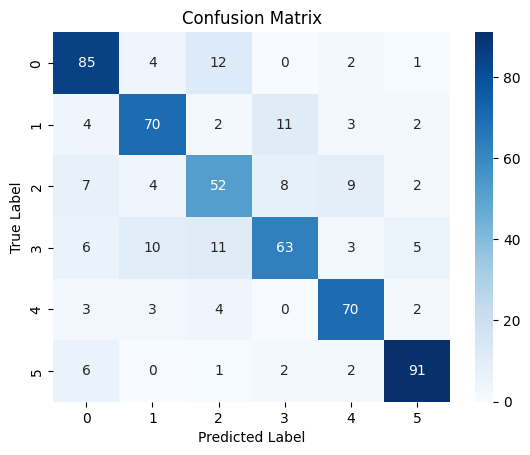

In [ ]:
# create a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# set the labels
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# set the title
plt.title("Confusion Matrix")

# show the plot
plt.show()

In [ ]:
test_labels_2

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.]], dtype=float32)

In [ ]:
predicted_bi_lstm.round()

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.]], dtype=float32)

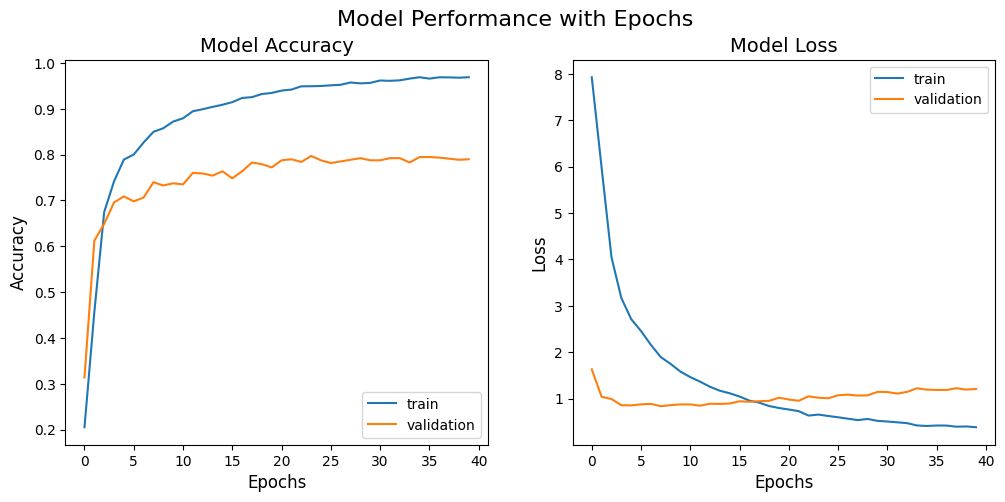

In [ ]:
def accuracy_plot(history):

    fig, ax = plt.subplots(1, 2, figsize=(12,5))

    fig.suptitle('Model Performance with Epochs', fontsize = 16)
    # Subplot 1
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy', fontsize = 14)
    ax[0].set_xlabel('Epochs', fontsize = 12)
    ax[0].set_ylabel('Accuracy', fontsize = 12)
    ax[0].legend(['train', 'validation'], loc='best')

    # Subplot 2
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss', fontsize = 14)
    ax[1].set_xlabel('Epochs', fontsize = 12)
    ax[1].set_ylabel('Loss', fontsize = 12)
    ax[1].legend(['train', 'validation'], loc='best')

    plt.savefig(f'/content/drive/MyDrive/Text Sensitivity/model_accuracy fasttext(sg=0).pdf',format='pdf', bbox_inches='tight')
accuracy_plot(history)

In [ ]:
len(train_data[0])